In [1]:
import sys
if not '/home/pop518504/git/gknet-benchmarks' in sys.path:
    sys.path.insert(0, '/home/pop518504/git/gknet-benchmarks')
    
from utils import *

# 100 runs


In [4]:
results = load_results_from_pickle("../results/100_runs/results_100_runs.pickle")

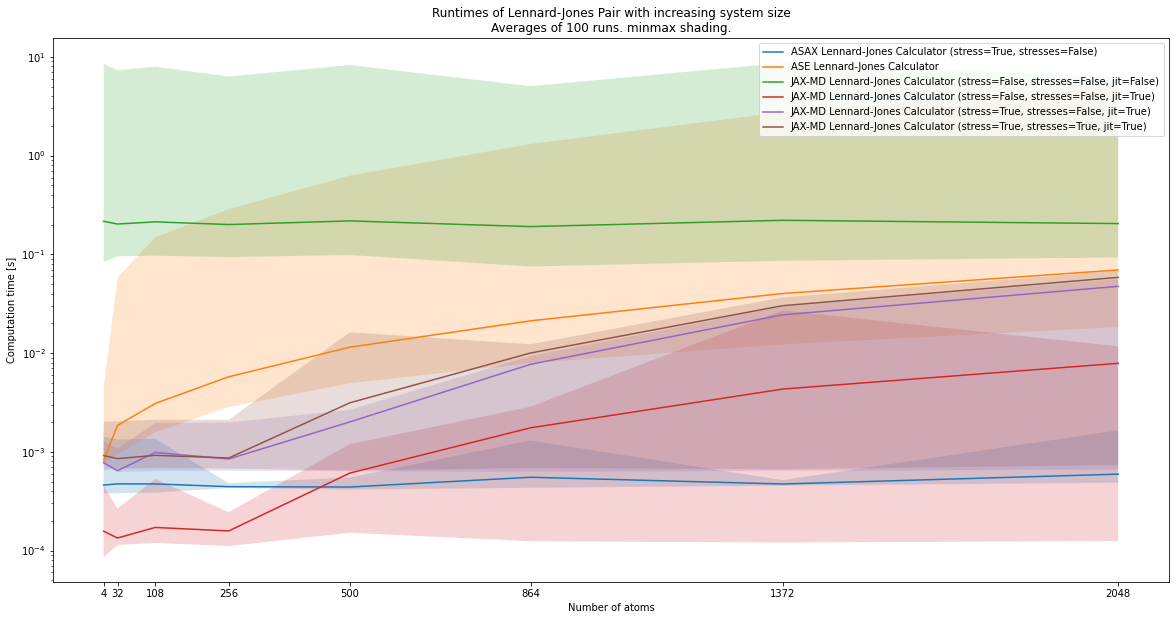

In [5]:
plot_runtimes(results=results, 
              plot_title='Runtimes of Lennard-Jones Pair with increasing system size', 
              shade_by='minmax')

## Omitting slow calculators

i.e. ASE and JAX-MD without `jit`.

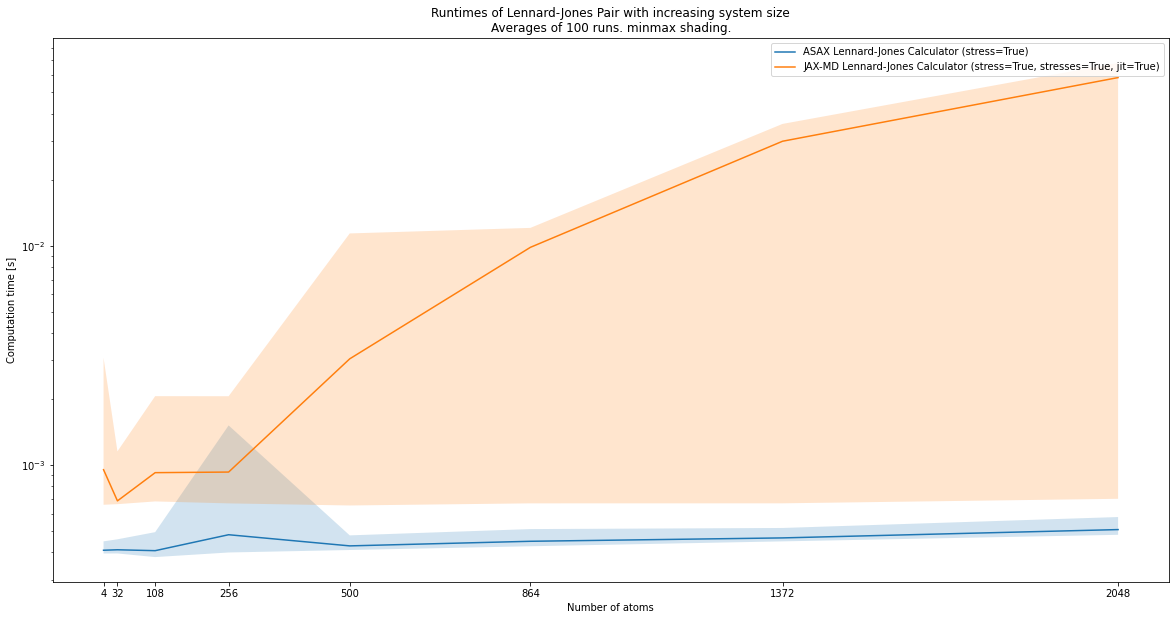

In [9]:
filtered_results = list(filter(lambda r: "jit=False" not in r.calculator.description, results))
filtered_results = list(filter(lambda r: "ASE" not in r.calculator.description, filtered_results))

plot_runtimes(results=filtered_results, 
              plot_title='Runtimes of Lennard-Jones Pair with increasing system size', 
              shade_by='minmax')

## Caching in JAX-MD
- Within each of the 100 runs, we don't change the system at all.
- Caching would be possible and could distort results.
- Here, we exclude everything except the JAX-MD calculator.
- There are fluctuations but caching would likely prevent the mean curve from constantly increasing.

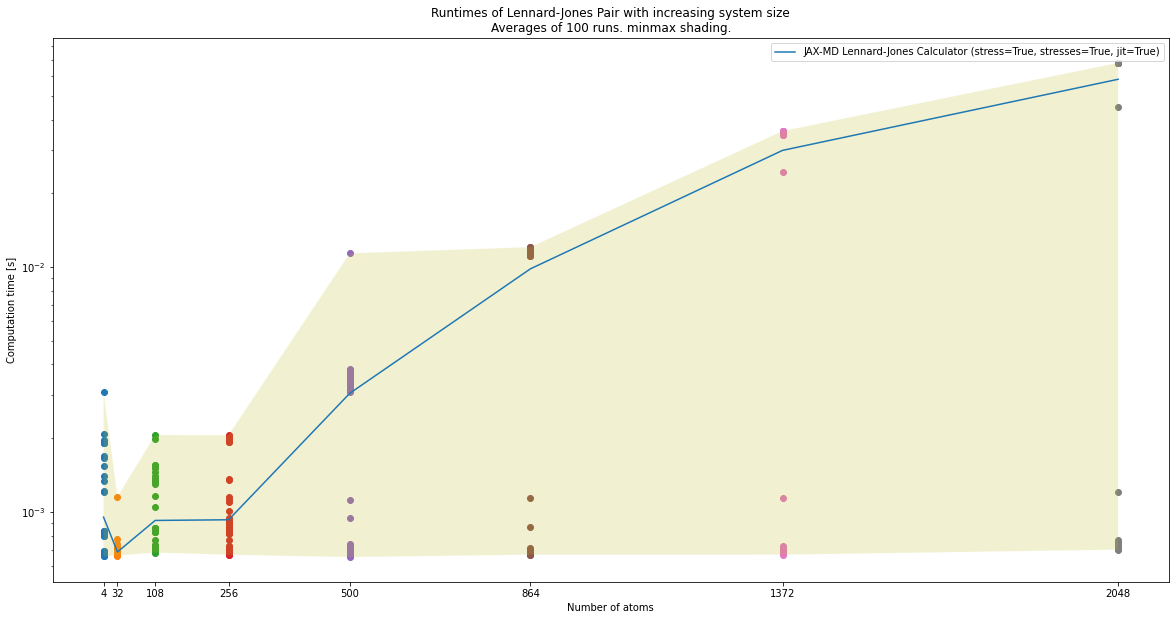

In [2]:
filtered_results = list(filter(lambda r: "jit=True" in r.calculator.description, results))

plot_runtimes(results=filtered_results, 
              plot_title='Runtimes of Lennard-Jones Pair with increasing system size', 
              scatter=True,
              shade_by='minmax')